<a href="https://www.kaggle.com/code/mustafacihadgoktepe/iris-kernel-knn?scriptVersionId=107747579" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/kaggle/input/iris/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
data.drop('Id', axis=1, inplace=True)

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


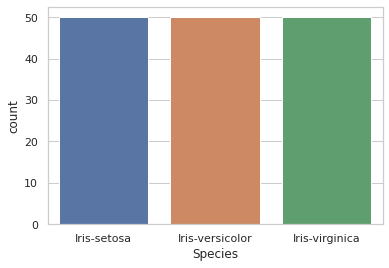

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.countplot(x='Species', data=data);

In [6]:
grouped_data = data.groupby('Species').mean()
grouped_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<Figure size 720x360 with 0 Axes>

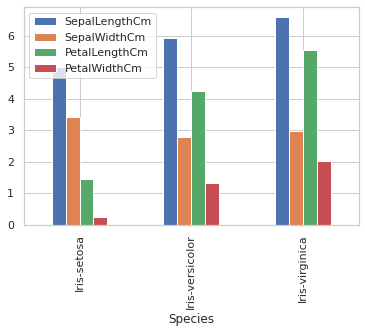

In [7]:
plt.figure(figsize=(10,5))
grouped_data.plot.bar();

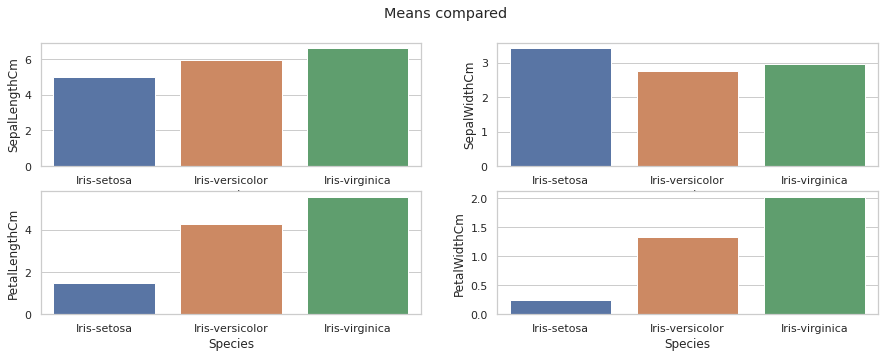

In [31]:
fig, ax = plt.subplots(2,2,figsize=(15,5))
for i, col in enumerate(grouped_data):
    sns.barplot(x=grouped_data.index, y=col, data=grouped_data, ax=ax[i//2, i%2]);
fig.suptitle('Means compared');

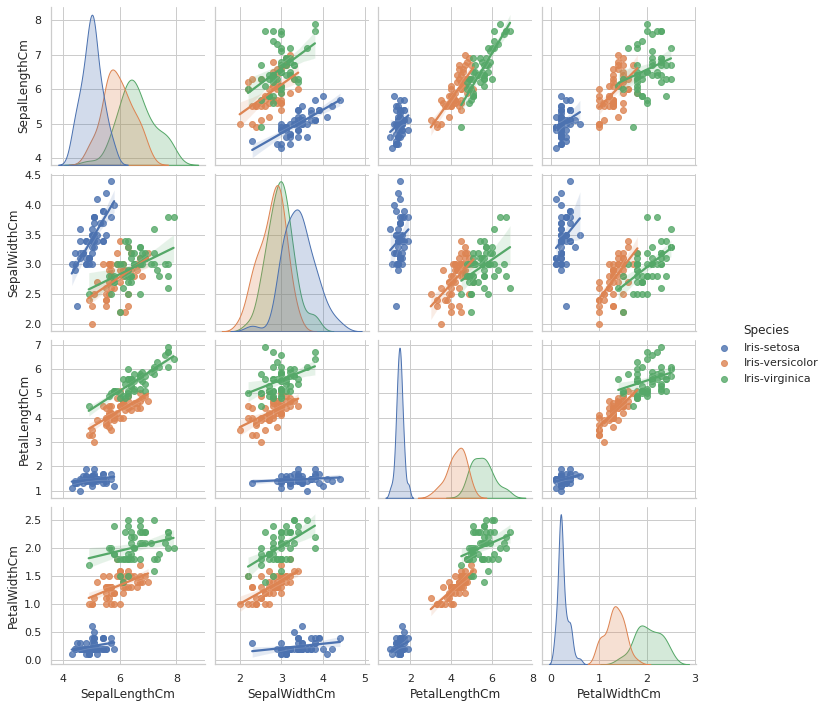

In [20]:
sns.pairplot(data, kind='reg', hue='Species');

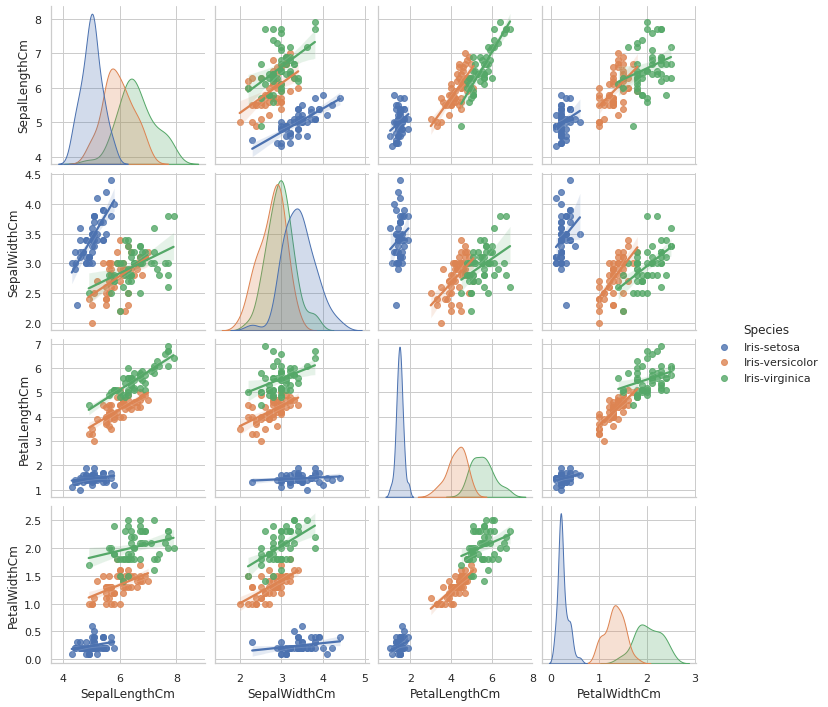

In [40]:
sns.pairplot(data, kind='reg', hue='Species');

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop(['Species'], axis=1)
y = data['Species']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify = y)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 
              'Random Forest', 'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent',
              'Gradient Boosting Classifier']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)
    acc_scores.append(acc_model)

In [43]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
1,Logistic Regression,90.00
2,Gaussian Naive Bayes,90.00
4,Random Forest,90.00
5,KNN or k-Nearest Neighbors,90.00
0,Decision Tree,86.67
3,Linear SVC,86.67
7,Gradient Boosting Classifier,86.67
6,Stochastic Gradient Descent,66.67


In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [45]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val = models_val.sort_values(by='Cross validation mean scores', ascending=False)
models_val

,Model name,Cross validation mean scores
5,KNN or k-Nearest Neighbors,96.888889
1,Logistic Regression,96.666667
2,Gaussian Naive Bayes,95.777778
7,Gradient Boosting Classifier,95.333333
3,Linear SVC,95.111111
4,Random Forest,94.888889
0,Decision Tree,94.222222
6,Stochastic Gradient Descent,87.555556


In [46]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [47]:
probability_of_valid_data = pd.DataFrame(knn.predict_proba(X_valid), columns=knn.classes_)
probability_of_valid_data.index += 1
probability_of_valid_data

,Iris-setosa,Iris-versicolor,Iris-virginica
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.2,0.8
9,0.0,1.0,0.0
10,0.0,0.4,0.6


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred, average='weighted'),
    recall_score(y_valid, y_pred, average='weighted'),
    f1_score(y_valid, y_pred, average='weighted'))
     )

Precision score is: 0.902357 
Recall score is: 0.900000 
f1 score is: 0.899749


In [50]:
from sklearn.metrics import classification_report

report_KNN = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True))
report_KNN

,Iris-setosa,Iris-versicolor,Iris-virginica,accuracy,macro avg,weighted avg
precision,1.0,0.888889,0.818182,0.9,0.902357,0.902357
recall,1.0,0.800000,0.900000,0.9,0.900000,0.900000
f1-score,1.0,0.842105,0.857143,0.9,0.899749,0.899749
support,10.0,10.000000,10.000000,0.9,30.000000,30.000000


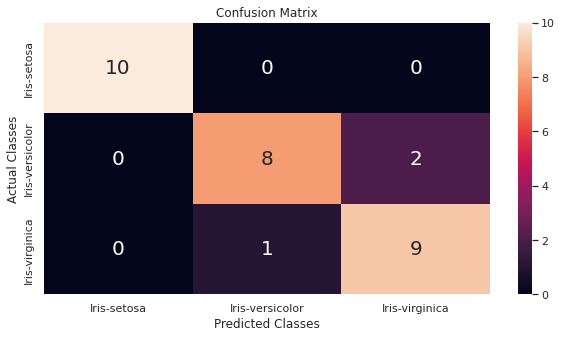

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix_KNN = confusion_matrix(y_valid, y_pred)
cm_dataframe_KNN = pd.DataFrame(confusion_matrix_KNN, columns=knn.classes_, index=knn.classes_)

plt.figure(figsize=(10,5))
p = sns.heatmap(cm_dataframe_KNN, annot=True, annot_kws={'size':20})
p.set(title='Confusion Matrix',
      xlabel='Predicted Classes',
      ylabel='Actual Classes');

Thanks for reading.